In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
df = pd.read_csv("stocks_with_RSI_EMA.csv")
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df

,date,open,high,low,close,volume,Name,up,down,up_ema,down_ema,RS,RSI,EMA
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.00,0.00,0.000000,0.000000,0.000000,0.000000,14.750000
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.00,0.29,0.000000,0.290000,0.000000,0.000000,14.460000
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.00,0.19,0.000000,0.190000,0.000000,0.000000,14.270000
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.39,0.00,0.390000,0.000000,0.000000,0.000000,14.660000
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,0.00,0.67,0.000000,0.670000,0.000000,0.000000,13.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,1.09,0.00,0.479755,0.478173,1.003310,50.082610,77.813669
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,0.00,1.04,0.383804,0.590538,0.649923,39.391109,77.606935
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,0.00,2.95,0.307043,1.062431,0.289001,22.420539,76.851548
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,0.00,0.56,0.245635,0.961944,0.255352,20.341089,76.135239


In [23]:
NVDA = df.drop(df[df.Name != 'NVDA'].index)
AAPL = df.drop(df[df.Name != 'AAPL'].index)

dev_ema = [0] * 1259
high_or_low = [0] * 1259
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

for i in range(1259):
    dev_ema[i] = NVDA.iloc[i, 13] - NVDA.iloc[i, 4]
    
    if dev_ema[i] > 0:
        high_or_low[i] = 1
    if dev_ema[i] < 0:
        high_or_low[i] = -1
    
    if (NVDA.iloc[i, 7] != 0) and (NVDA.iloc[i, 8] == 0):
        movement[i] = NVDA.iloc[i, 7]
        movement_sign[i] = 1
    if (NVDA.iloc[i, 8] != 0) and (NVDA.iloc[i, 7] == 0):
        movement[i] = -1 * NVDA.iloc[i, 8]
        movement_sign[i] = -1
    if (NVDA.iloc[i, 13] >= 70):
        rsi_sign[i] = 1
    if (NVDA.iloc[i, 13] <= 30):
        rsi_sign[i] = -1

NVDA['High or Low'] = high_or_low
NVDA['DEV from EMA'] = dev_ema
NVDA['Movement'] = movement
NVDA['Movement sign'] = movement_sign
NVDA['RSI sign'] = rsi_sign

dev_ema = [0] * 1259
high_or_low = [0] * 1259
movement = [0] * 1259
movement_sign = [0] * 1259
rsi_sign = [0] * 1259

for i in range(1259):
    dev_ema[i] = AAPL.iloc[i, 13] - AAPL.iloc[i, 4]
    
    if dev_ema[i] > 0:
        high_or_low[i] = 1
    if dev_ema[i] < 0:
        high_or_low[i] = -1
    
    if (AAPL.iloc[i, 7] != 0) and (AAPL.iloc[i, 8] == 0):
        movement[i] = AAPL.iloc[i, 7]
        movement_sign[i] = 1
    if (AAPL.iloc[i, 8] != 0) and (AAPL.iloc[i, 7] == 0):
        movement[i] = -1 * AAPL.iloc[i, 8]
        movement_sign[i] = -1
        
    if (AAPL.iloc[i, 13] >= 70):
        rsi_sign[i] = 1
    if (AAPL.iloc[i, 13] <= 30):
        rsi_sign[i] = -1

AAPL['DEV from EMA'] = dev_ema
AAPL['High or Low'] = high_or_low
AAPL['Movement'] = movement
AAPL['Movement sign'] = movement_sign
AAPL['RSI sign'] = rsi_sign

<AxesSubplot:xlabel='Movement sign', ylabel='High or Low'>

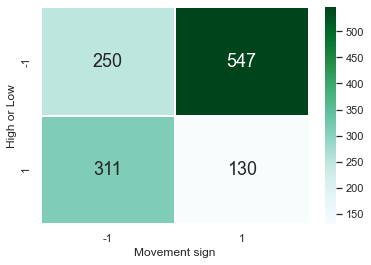

In [24]:
NVDA = NVDA.loc[NVDA['Movement sign'] != 0]
NVDA = NVDA.loc[NVDA['High or Low'] != 0]
AAPL = AAPL.loc[AAPL['Movement sign'] != 0]
AAPL = AAPL.loc[AAPL['High or Low'] != 0]

f = plt.figure(figsize=(6, 4))
sb.heatmap(NVDA.groupby(['High or Low', 'Movement sign']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
    

<AxesSubplot:xlabel='Movement sign', ylabel='High or Low'>

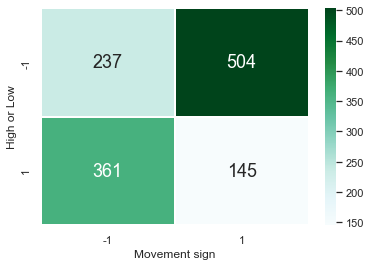

In [25]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(AAPL.groupby(['High or Low', 'Movement sign']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



Intercept of Regression 	: b =  [-0.12911091]
Coefficients of Regression 	: a =  [[-0.48115861]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3765096803146133
Mean Squared Error (MSE) 	: 2.7918904037723644

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.27493191515415116
Mean Squared Error (MSE) 	: 2.7630783854938685



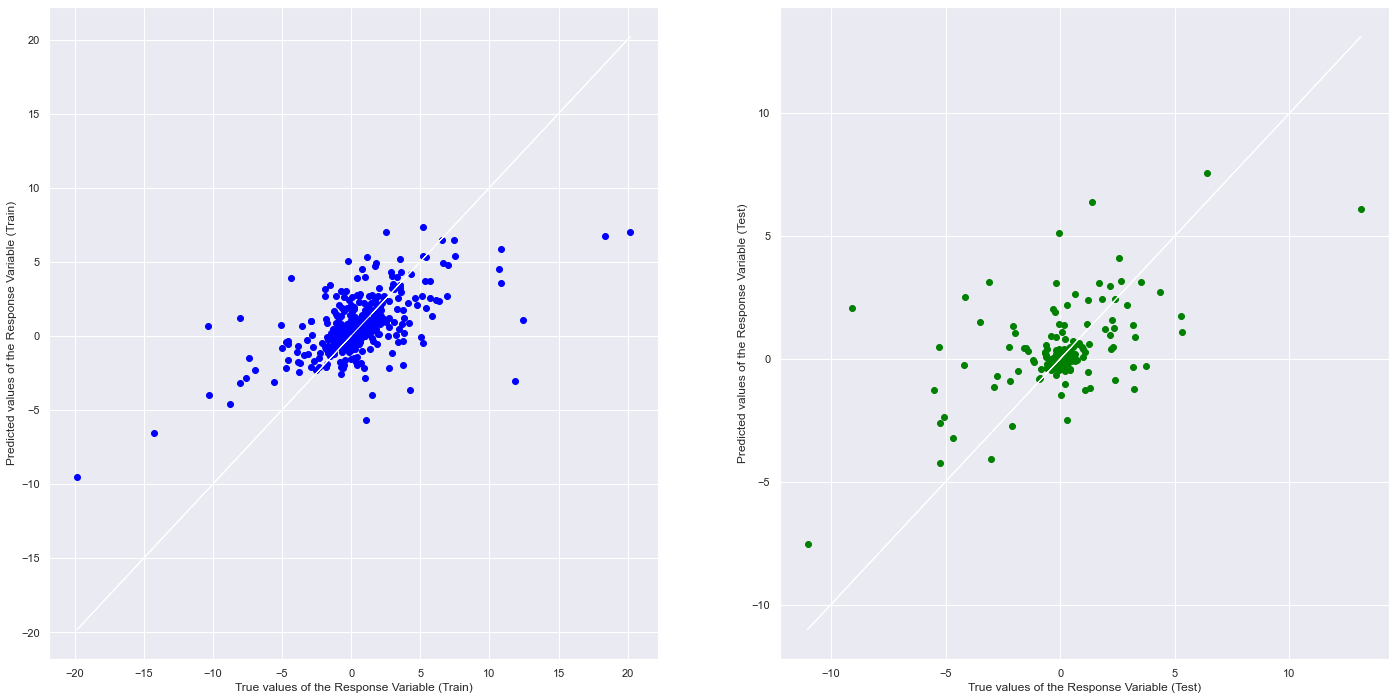

In [27]:
NVDA_movement = pd.DataFrame(NVDA['Movement'])
NVDA_dev = pd.DataFrame(NVDA['DEV from EMA'])
X_train, X_test, y_train, y_test = train_test_split(NVDA_dev, NVDA_movement, test_size = 0.2)


linreg = LinearRegression()         
linreg.fit(X_train, y_train)  

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [-0.03860064]
Coefficients of Regression 	: a =  [[-0.45448305]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3574412338530526
Mean Squared Error (MSE) 	: 1.5943997434071449

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37648729850817353
Mean Squared Error (MSE) 	: 1.5787309460167138



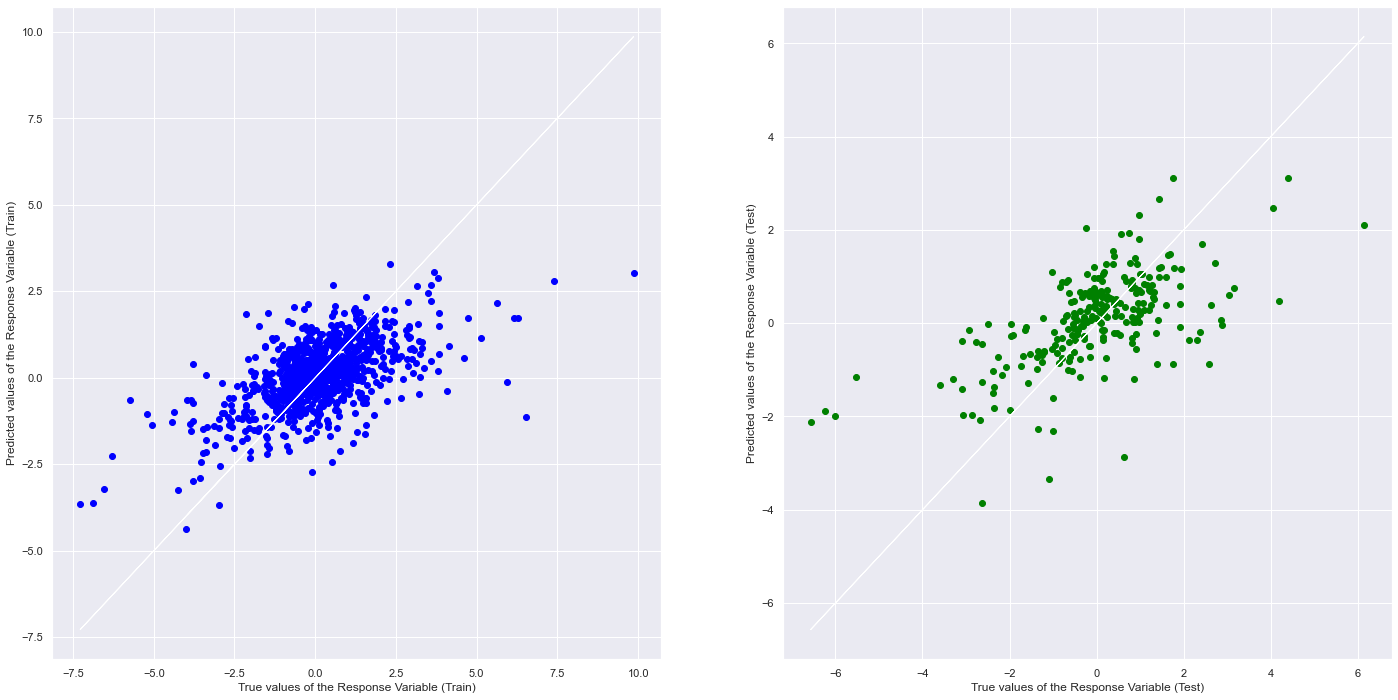

In [28]:
AAPL_movement = pd.DataFrame(AAPL['Movement'])
AAPL_dev = pd.DataFrame(AAPL['DEV from EMA'])
AX_train, AX_test, Ay_train, Ay_test = train_test_split(AAPL_dev, AAPL_movement, test_size = 0.2)


linreg = LinearRegression()         
linreg.fit(AX_train, Ay_train)  

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


Ay_train_pred = linreg.predict(AX_train)
Ay_test_pred = linreg.predict(AX_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(AX_train, Ay_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Ay_train, Ay_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(AX_test, Ay_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Ay_test, Ay_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Ay_train, Ay_train_pred, color = "blue")
axes[0].plot(Ay_train, Ay_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Ay_test, Ay_test_pred, color = "green")
axes[1].plot(Ay_test, Ay_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [-1.90314204]
Coefficients of Regression 	: a =  [[0.0354356]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11347489950785028
Mean Squared Error (MSE) 	: 4.103661069480182

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11989395531814728
Mean Squared Error (MSE) 	: 2.814735013662063



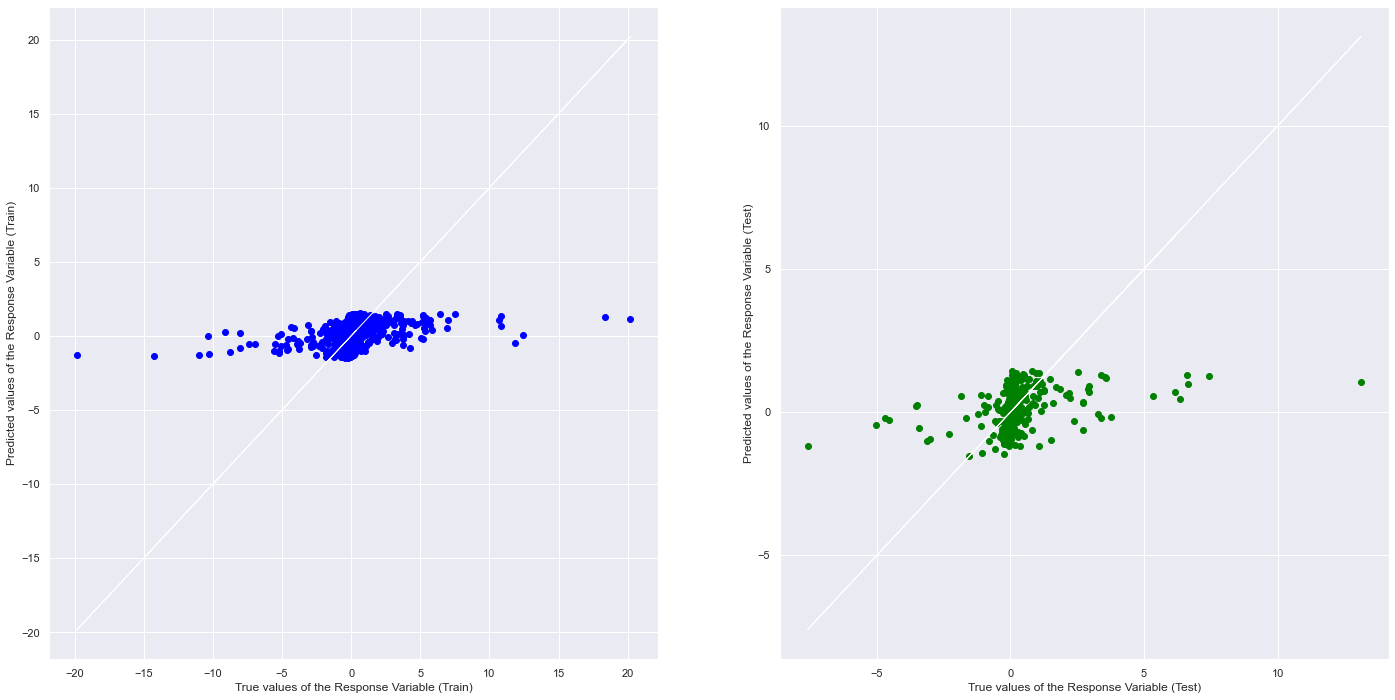

In [29]:
NVDA_RSI = pd.DataFrame(NVDA['RSI'])
X_train, X_test, y_train, y_test = train_test_split(NVDA_RSI, NVDA_movement, test_size = 0.2)


linreg = LinearRegression()         
linreg.fit(X_train, y_train)  

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [-1.93024744]
Coefficients of Regression 	: a =  [[0.03618757]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.24263503658636332
Mean Squared Error (MSE) 	: 1.8536135134368585

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2878755385144208
Mean Squared Error (MSE) 	: 1.9019349211522996



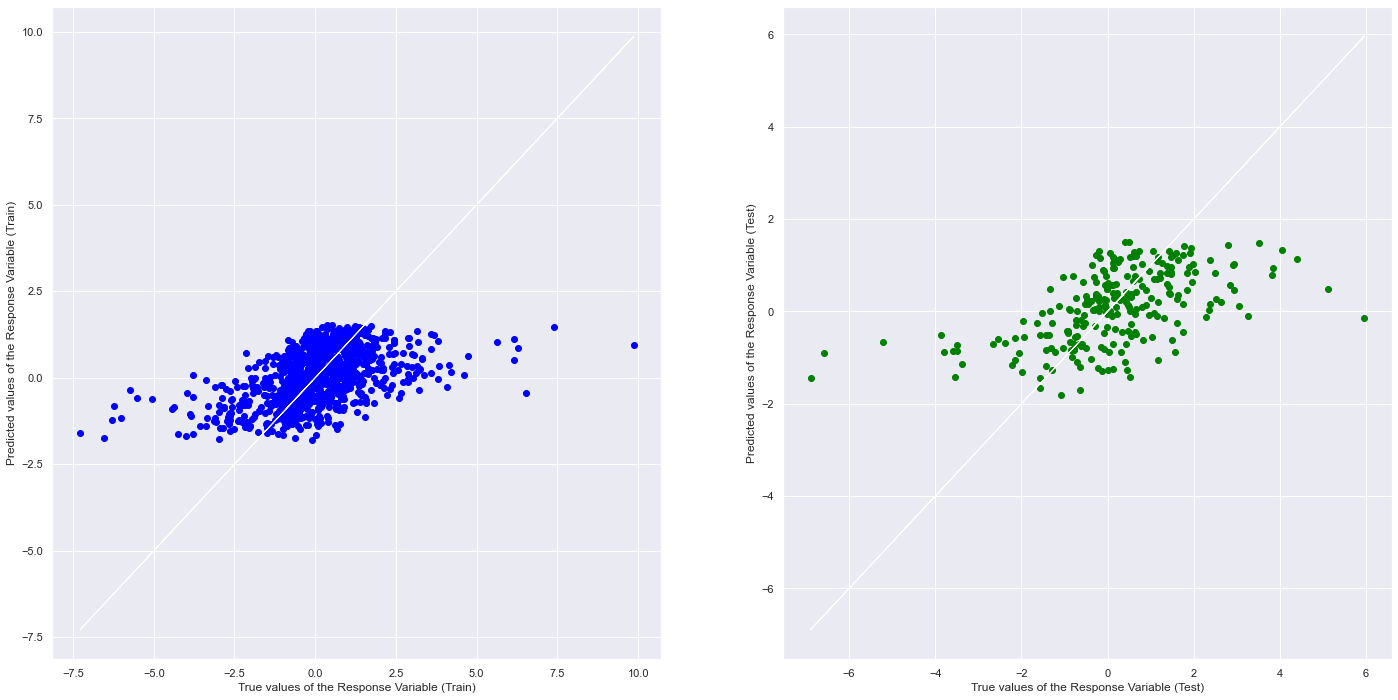

In [30]:
AAPL_movement = pd.DataFrame(AAPL['Movement'])
AAPL_RSI = pd.DataFrame(AAPL['RSI'])
AX_train, AX_test, Ay_train, Ay_test = train_test_split(AAPL_RSI, AAPL_movement, test_size = 0.2)


linreg = LinearRegression()         
linreg.fit(AX_train, Ay_train)  

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


Ay_train_pred = linreg.predict(AX_train)
Ay_test_pred = linreg.predict(AX_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(AX_train, Ay_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Ay_train, Ay_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(AX_test, Ay_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Ay_test, Ay_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Ay_train, Ay_train_pred, color = "blue")
axes[0].plot(Ay_train, Ay_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Ay_test, Ay_test_pred, color = "green")
axes[1].plot(Ay_test, Ay_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<AxesSubplot:xlabel='Movement sign', ylabel='RSI sign'>

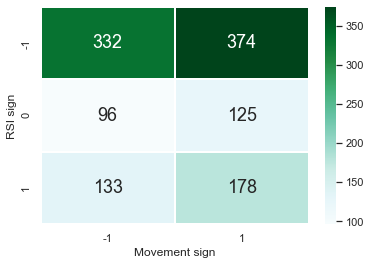

In [31]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(NVDA.groupby(['RSI sign', 'Movement sign']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
    

<AxesSubplot:xlabel='Movement sign', ylabel='RSI sign'>

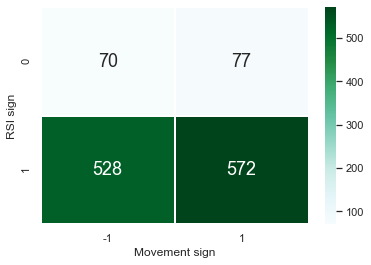

In [32]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(AAPL.groupby(['RSI sign', 'Movement sign']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
    